In [ ]:
import pandas as pd

# Create an empty dataframe to store the combined data
df_final = pd.DataFrame()

# Loop through the years from 2009 to 2022
for year in range(2009, 2023):
    # Create the file name
    file_name = "mccutchen_" + str(year) + ".csv"
    
    # Load the data from the current file into a dataframe
    df = pd.read_csv(file_name)
    df['Date'] = df['Date'].str.replace('\(.*\)', '')
    df['Date'] = df['Date'] + ", " + str(year)


    # Append the data from the current file to the final dataframe
    df_final = df_final.append(df, ignore_index=True)


<ipython-input-1-af120ad23946>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Date'] = df['Date'].str.replace('\(.*\)', '')


In [ ]:
# Print all the values in the list, one per line
for item in df_final['Date']:
    print(item, end='\n')


In [ ]:
df_OPS = df_final[['Date','OPS']].dropna()

In [ ]:
df_OPS
import pandas as pd

# Create a sample DataFrame with a date column

# Convert the date column to datetime using the first format
df_OPS['datetime1'] = pd.to_datetime(df_OPS['Date'], format='%b %d, %Y', errors='coerce')
df_OPS['datetime2'] = pd.to_datetime(df_OPS['Date'], format='%d-%b, %Y', errors='coerce')
df_OPS['final_datetime'] = df_OPS[['datetime1', 'datetime2']].bfill(axis=1).iloc[:, 0]
df_OPS = df_OPS.drop(columns=['datetime1', 'datetime2'])

In [ ]:
for i in df_OPS['final_datetime']:
  i = pd.to_datetime(i).date()

In [ ]:
df_proph = df_OPS.dropna()[['final_datetime','OPS']]
df_proph = df_proph.rename(columns = {"final_datetime":"ds", "OPS" : "y"})
df_proph = df_proph[df_proph['ds'] <= '2022-09-30']

In [ ]:
import pandas as pd
from prophet import Prophet
model = Prophet(seasonality_mode='multiplicative')
model.add_seasonality(name='yearly', period=365.25, fourier_order=5)
model.fit(df_proph)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2b1eogw4/car_vq2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2b1eogw4/ms0c_495.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36127', 'data', 'file=/tmp/tmp2b1eogw4/car_vq2i.json', 'init=/tmp/tmp2b1eogw4/ms0c_495.json', 'output', 'file=/tmp/tmp2b1eogw4/prophet_model09_o4yzf/prophet_model-20230213003800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:38:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:38:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2197,2023-09-25
2198,2023-09-26
2199,2023-09-27
2200,2023-09-28
2201,2023-09-29


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2197,2023-09-25,0.685420,0.538005,0.827938
2198,2023-09-26,0.681627,0.548363,0.819229
2199,2023-09-27,0.679474,0.533456,0.821645
2200,2023-09-28,0.679499,0.540074,0.808125
2201,2023-09-29,0.677475,0.532359,0.822052


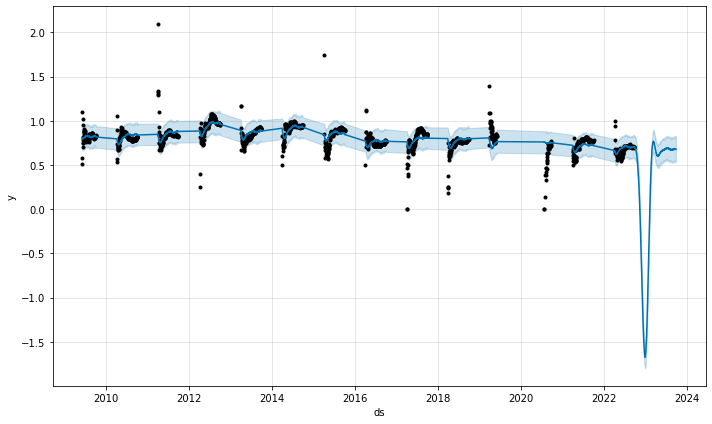

In [ ]:
fig1 = model.plot(forecast)


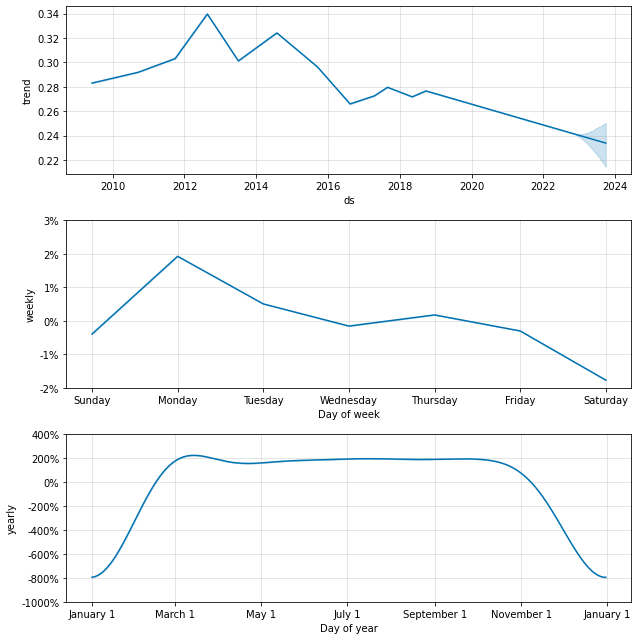

In [ ]:
# Python
fig2 = model.plot_components(forecast)


In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [ ]:
df_for = forecast[(forecast['ds'] > '2023-04-01')][['ds','yhat']]

In [ ]:
df_for = df_for.set_index('ds')
df_monthly = df_for.resample('Y').mean()
df_monthly = df_monthly.reset_index()


In [ ]:
df_monthly

,ds,yhat
0,2023-12-31,0.662809
